<a href="https://colab.research.google.com/github/souadkhailia/pandas-on-the-titanic-dataset/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
url='https://drive.google.com/file/d/1zP14pOhU5dd1pNc6JnhF-XJOzuUmtGxI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
url

'https://drive.google.com/uc?id=1zP14pOhU5dd1pNc6JnhF-XJOzuUmtGxI'

In [4]:
df = pd.read_csv(url)

Display the head of the dataframe.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 the percentage of people who survived?

In [6]:
df['Survived'].mean().round(2)

0.38

How many of each sex survived?

In [7]:
df[df['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

Considering only the group of passengers who paid less than $10, what percentage of this group survived?

In [8]:
df[df['Fare']<10]['Survived'].value_counts(normalize=True)

0    0.800595
1    0.199405
Name: Survived, dtype: float64

In [9]:
#we are only interested in those who survived
df[df['Fare']<10]['Survived'].value_counts(normalize=True)[1]

0.19940476190476192

Overall, what is the average age of those who didn't survive?

In [10]:
df[df['Survived']==0]['Age'].mean()

30.62617924528302

Overall, what is the average age of those who did survive?

In [11]:
df[df['Survived']==1]['Age'].mean()

28.343689655172415

What is the average age of those who did and didn't survive grouped by Sex?

In [12]:
#who did survive
df[df['Survived']==1].groupby("Sex")['Age'].mean()

Sex
female    28.847716
male      27.276022
Name: Age, dtype: float64

In [13]:
#who did not survive
df[df['Survived']==0].groupby("Sex")['Age'].mean()

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64

In [14]:
# Transform Sex column into a non text form.
# I choose four features, you could have chosen others
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']

# Make Sex column into something you can feed into a model
# Has
df['Sex'] = df['Sex'].replace({'male': 0,
                               'female': 1})

# Remove rows where age is nan from the dataset
df = df.dropna(subset=['Age'])

# Create features matrix and target vector
X = df[feature_cols]
y = df['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
# Make a pipeline to scale the data and fit a model
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model on the data
logreg_pipe.fit(X_train, y_train)

# class predictions (not predicted probabilities)
predictions = logreg_pipe.predict(X_test)
print('Predictions:')
predictions

Predictions:


array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0])

Confusion Matrix

In [16]:
# actual values what an algorithm should have predicted
print('True Values')
y_test.values

True Values


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix

# actual values: y_test.values
# predictions: model predictions
cm = confusion_matrix(y_test.values, predictions)

cm

array([[87, 16],
       [17, 59]])

In [18]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,87,16
1,17,59


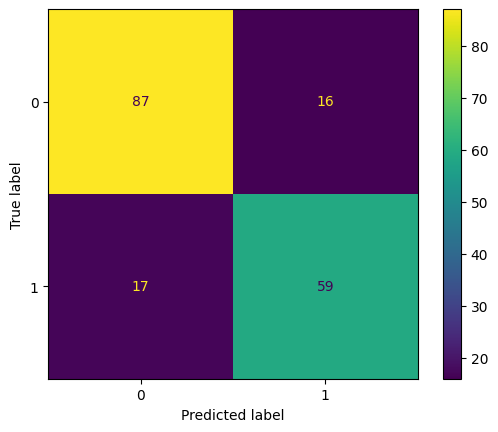

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

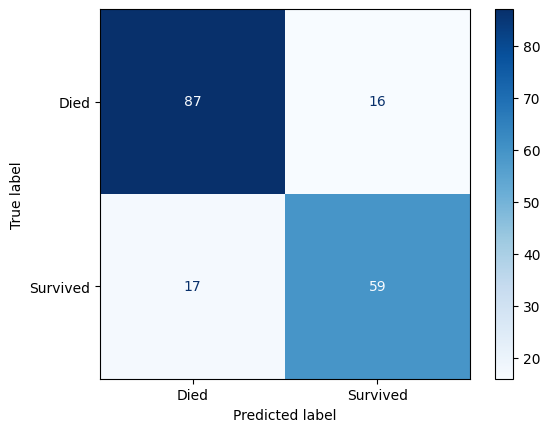

In [20]:
# Plot the confusion matrix
labels=['Died','Survived']
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        display_labels=labels,
                                        cmap='Blues');

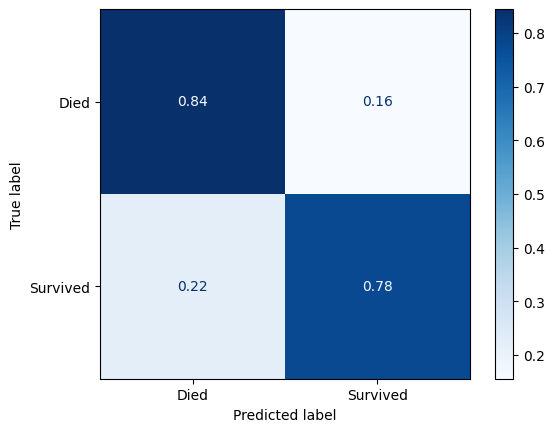

In [21]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        display_labels=labels,
                                        cmap='Blues',
                                        normalize='true');